# Introduction
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

 - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

 - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

In [3]:
df = pd.read_csv('loan.csv', low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [36]:
pd.set_option('display.max_columns', 100)
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [37]:
#Checking for null percentage
pd.set_option('display.max_rows', 200)
display(round(df.isnull().sum().sort_values(ascending=False)/len(df.index) * 100,2))

total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.00
dti_joint       

In [38]:
#Removing the following columns
# 1. > 90% null columns 
# 2. "desc" 
# 3. all columns which have all zero values
columnsToBeDropped =  df.isnull().sum().sort_values(ascending=False)[0:58].index.to_list()
loanDf = df.drop(columns=columnsToBeDropped)
loanDf = loanDf.drop(columns=["emp_title","title","chargeoff_within_12_mths","delinq_amnt","collections_12_mths_ex_med","tax_liens","acc_now_delinq","out_prncp","out_prncp_inv","policy_code"])
loanDf = loanDf.dropna()

In [39]:
#converting datatype to string
loanDf["id"] = loanDf["id"].astype(str)
loanDf["member_id"] = loanDf["member_id"].astype(str)

#converting to int by removing the "months" suffix
loanDf["term"] = loanDf["term"].str.extract('(\d+)').astype(int)

loanDf["emp_length"] = loanDf["emp_length"].astype(str).str.extract('(\d+)')
loanDf["emp_length"] = pd.to_numeric(loanDf["emp_length"],errors="coerce")

# changing datatype to float
loanDf["int_rate"] = loanDf["int_rate"].astype(str).str.rstrip("%")
loanDf["int_rate"] = pd.to_numeric(loanDf["int_rate"],errors="coerce")

loanDf["revol_util"] = loanDf["revol_util"].astype(str).str.rstrip("%")
loanDf["revol_util"] = pd.to_numeric(loanDf["revol_util"],errors="coerce")

# changing datatype to date
loanDf["issue_d"] = pd.to_datetime(loanDf["issue_d"], format="%b-%y")
loanDf["last_pymnt_d"] = pd.to_datetime(loanDf["last_pymnt_d"], format="%b-%y")
loanDf["last_credit_pull_d"] = pd.to_datetime(loanDf["last_credit_pull_d"], format="%b-%y")
loanDf["earliest_cr_line"] = pd.to_datetime(loanDf["earliest_cr_line"], format="%b-%y")


In [41]:
#imputing missing values (mean is skewed) 
loanDf.loc[np.isnan(loanDf["emp_length"]),["emp_length"]] = loanDf["emp_length"].median()
loanDf.loc[np.isnan(loanDf["revol_util"]),["revol_util"]] = loanDf["revol_util"].median()
loanDf.loc[np.isnan(loanDf["pub_rec_bankruptcies"]),["pub_rec_bankruptcies"]] = loanDf["pub_rec_bankruptcies"].median()
display(loanDf.describe(percentiles=[0.25,0.5,0.75,0.90]))
display(loanDf)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,3.783500e+04,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000
mean,11328.321660,11050.282807,10618.101627,42.557103,12.071015,327.138924,5.114021,6.967097e+04,13.377173,0.145817,0.866816,9.325096,0.053707,13479.951659,49.128158,22.199260,12310.822313,11840.841131,9912.751958,2302.183253,1.334466,94.552722,12.133188,2730.383104,0.041496
std,7477.228389,7204.846055,7113.088818,10.694760,3.734431,209.085008,3.405876,6.364337e+04,6.655964,0.490501,1.066483,4.375401,0.234746,15877.285797,28.277588,11.382805,9083.318493,8947.215304,7089.356282,2633.790190,7.178910,690.378098,148.109176,4489.579641,0.200363
min,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,5600.000000,5500.000000,5000.000000,36.000000,9.320000,168.750000,2.000000,4.188600e+04,8.270000,0.000000,0.000000,6.000000,0.000000,3791.000000,25.800000,14.000000,5647.297435,5387.560000,4800.000000,677.110000,0.000000,0.000000,0.000000,224.765000,0.000000
50%,10000.000000,10000.000000,9200.000000,36.000000,11.860000,283.200000,4.000000,6.000000e+04,13.470000,0.000000,1.000000,9.000000,0.000000,8978.000000,49.700000,21.000000,10072.214160,9610.880000,8000.010000,1376.240000,0.000000,0.000000,0.000000,563.430000,0.000000
75%,15000.000000,15000.000000,14602.600250,60.000000,14.610000,434.750000,9.000000,8.350000e+04,18.630000,0.000000,1.000000,12.000000,0.000000,17183.500000,72.600000,29.000000,16717.400985,16106.980000,14000.000000,2889.075000,0.000000,0.000000,0.000000,3400.980000,0.000000
90%,22445.000000,21000.000000,20000.000000,60.000000,17.060000,625.422000,10.000000,1.170084e+05,22.370000,1.000000,2.000000,15.000000,0.000000,29286.600000,87.900000,38.000000,24946.272744,24356.970000,20000.000000,5444.520000,0.000000,12.010000,0.000000,8482.454000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,f,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,1.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,f,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,f,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,f,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,f,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,154154,151536,4800,4800,1100.0,36,10.28,155.52,C,C1,1.0,RENT,35000.0,Not Verified,2007-11-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,226xx,VA,7.51,0,2000-03-01,0,11,1,5836,68.7,12,f,5134.085288,1176.56,4800.00,334.09,0.00,0.00,0.00,2008-08-01,3891.08,2008-08-01,INDIVIDUAL,1.0
39573,150940,150893,7000,7000,1000.0,36,10.59,227.82,C,C2,3.0,MORTGAGE,63500.0,Not Verified,2007-11-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,853xx,AZ,8.50,0,1989-02-01,1,9,1,14930,79.0,21,f,8174.021910,1167.72,7000.00,1174.02,0.00,0.00,0.00,2010-05-01,1571.29,2016-04-01,INDIVIDUAL,1.0
39623,132892,132889,9000,9000,700.0,36,12.49,301.04,D,D3,8.0,MORTGAGE,39000.0,Not Verified,2007-10-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,207xx,MD,5.08,0,1997-08-01,3,9,1,26233,62.9,37,f,4015.960000,311.64,1496.83,609.26,0.00,1909.87,668.36,2008-05-01,301.05,2016-05-01,INDIVIDUAL,1.0
39666,119043,119040,15450,15450,600.0,36,11.22,507.46,C,C4,2.0,MORTGAGE,40000.0,Not Verified,2007-08-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,201xx,VA,13.50,0,1992-11-01,3,13,1,6513,34.3,29,f,11652.750000,451.73,8688.59,2659.96,0.00,304.20,3.09,2009-10-01,1016.15,2010-03-01,INDIVIDUAL,1.0


# Univariate analysis

### Loan Status

Text(0.5, 1.0, 'Count of Loans based on status')

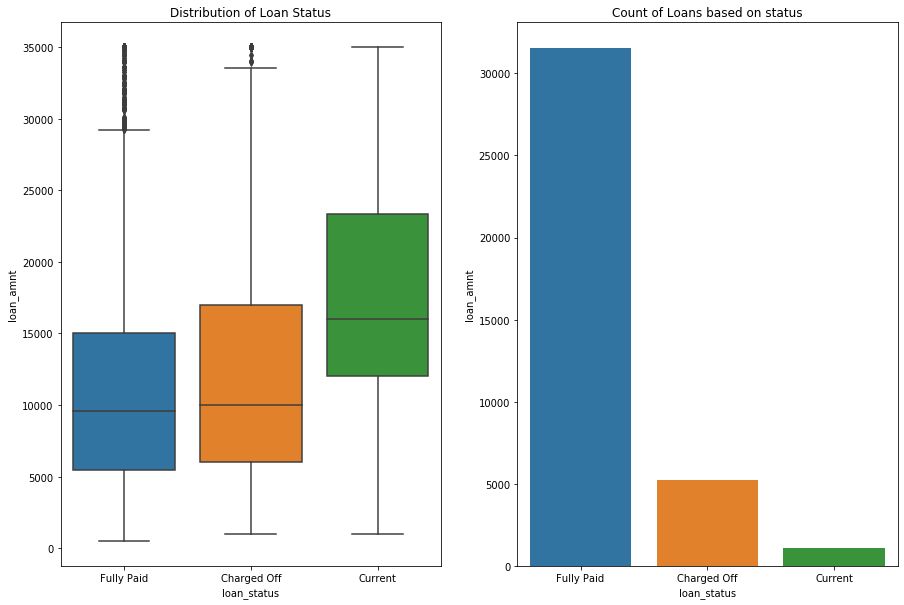

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status",y="loan_amnt",data=loanDf).set_title("Distribution of Loan Status")
plt.subplot(1,2,2)
sns.barplot(x="loan_status",y="loan_amnt",estimator=lambda x:len(x),data=loanDf).set_title("Count of Loans based on status")

# observation -
# 1. midvalue is about the same for Charged off and full paid clients
# 2. majority of clients fully pay their loans
                

### house ownership

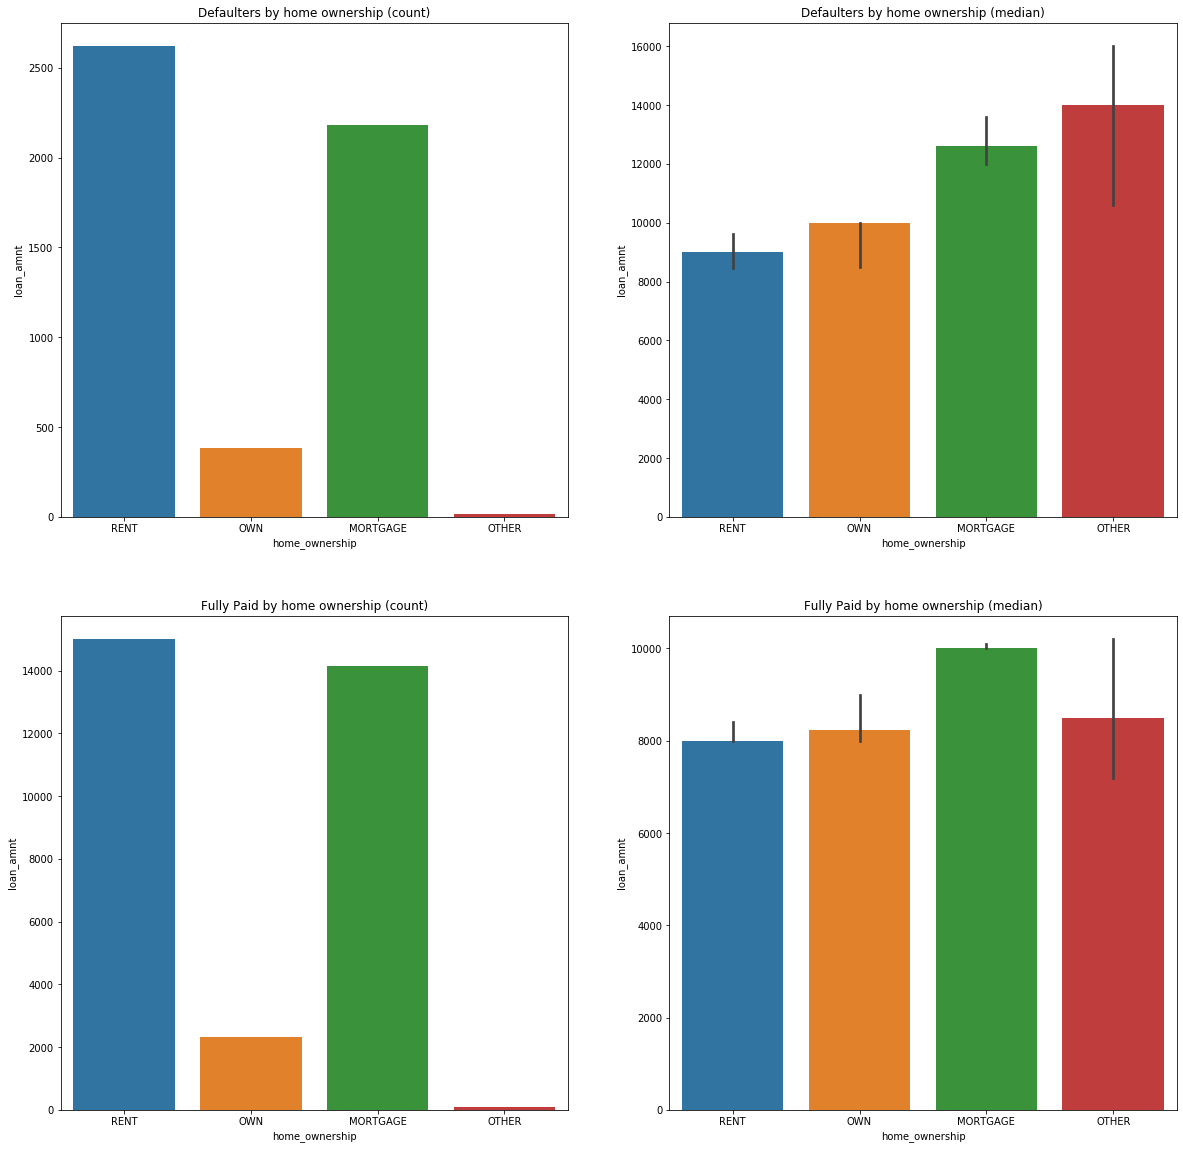

In [11]:
plt.figure(figsize=(20, 20))
paidOff = loanDf[loanDf["loan_status"] == "Fully Paid"]
defaulters=loanDf[loanDf["loan_status"] == "Charged Off"]
plt.subplot(2,2,1)
sns.barplot(x="home_ownership",y="loan_amnt",data=defaulters,estimator=lambda x : len(x)).set_title("Defaulters by home ownership (count)")
plt.subplot(2,2,2)
sns.barplot(x="home_ownership",y="loan_amnt",data=defaulters,estimator=np.median).set_title("Defaulters by home ownership (median)")
plt.subplot(2,2,3)
sns.barplot(x="home_ownership",y="loan_amnt",data=paidOff,estimator=lambda x : len(x)).set_title("Fully Paid by home ownership (count)")
plt.subplot(2,2,4)
sns.barplot(x="home_ownership",y="loan_amnt",data=paidOff,estimator=np.median).set_title("Fully Paid by home ownership (median)")
plt.show()

# observations- 
# 1. Major Charged off and Paid full clients have rented houses


### interest rates

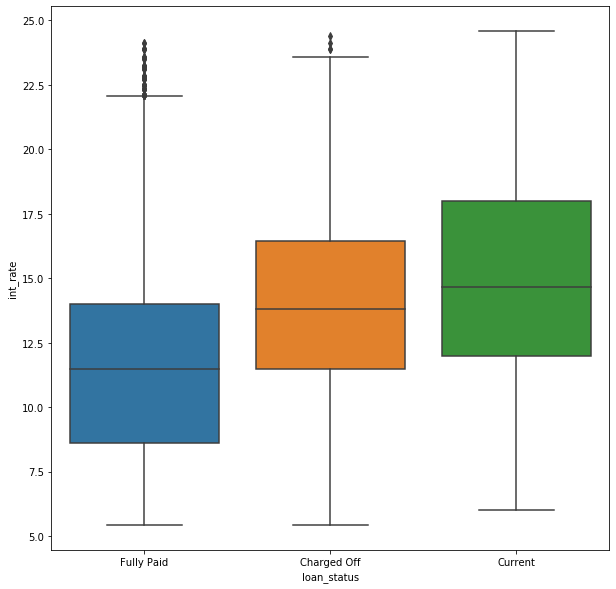

In [12]:
# by interest rates
plt.figure(figsize=(10, 10))
sns.boxplot(x="loan_status",y="int_rate",data=loanDf)

# Observations
# more likely to pay off for low interest rate as seen by median line

### purpose

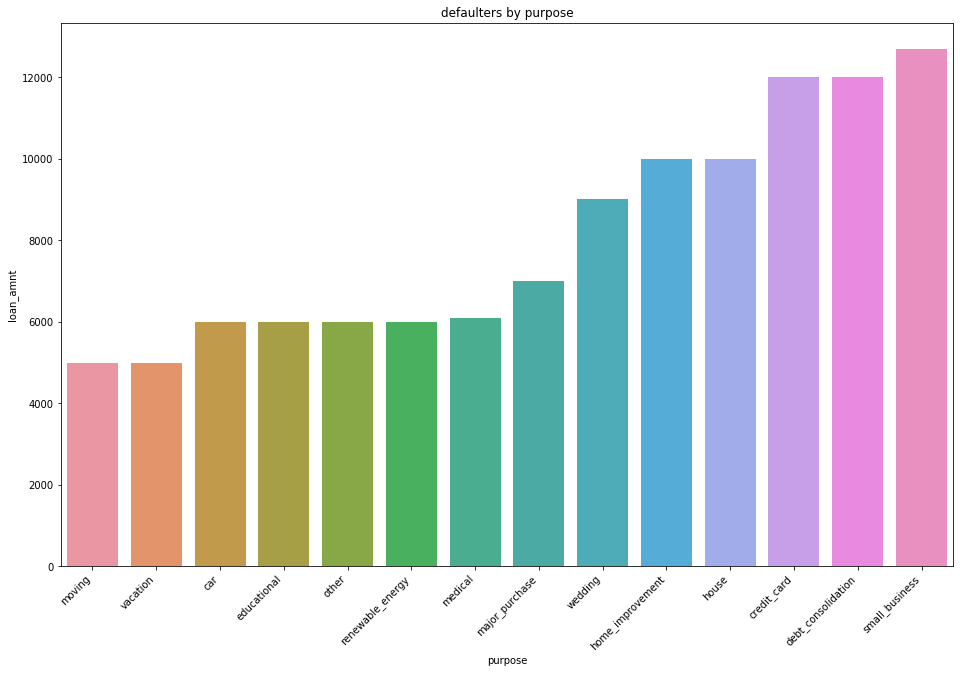

In [13]:
#by purpose - defaulters
plt.figure(figsize=(16,10))
defaultersByPurpose = defaulters.groupby("purpose")["loan_amnt"].median().reset_index().sort_values(by=["loan_amnt"])
sns.barplot(x="purpose",y="loan_amnt",data=defaultersByPurpose).set_title("defaulters by purpose")
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()
# small business are major defaulters

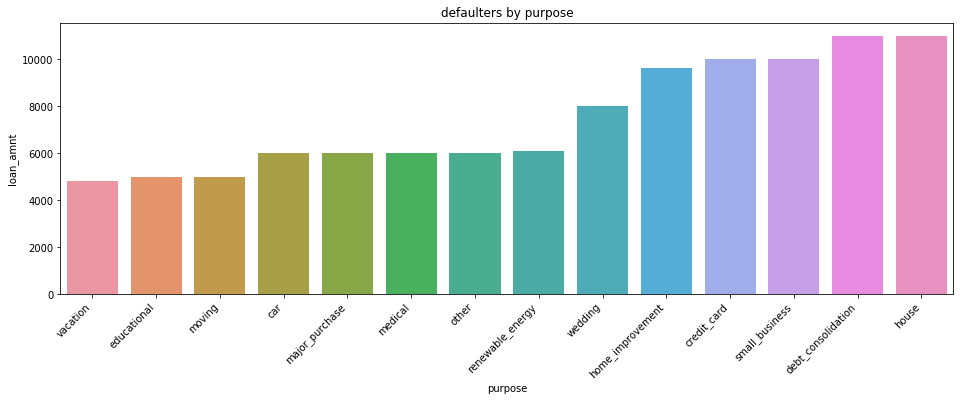

In [14]:
#by purpose - fullypaid
plt.figure(figsize=(16,5))
fullyPaidByPurpose = paidOff.groupby("purpose")["loan_amnt"].median().reset_index().sort_values(by=["loan_amnt"])
sns.barplot(x="purpose",y="loan_amnt",data=fullyPaidByPurpose).set_title("defaulters by purpose")
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()
# maybe loan regarding house are likely to be paid 

## revol_bal

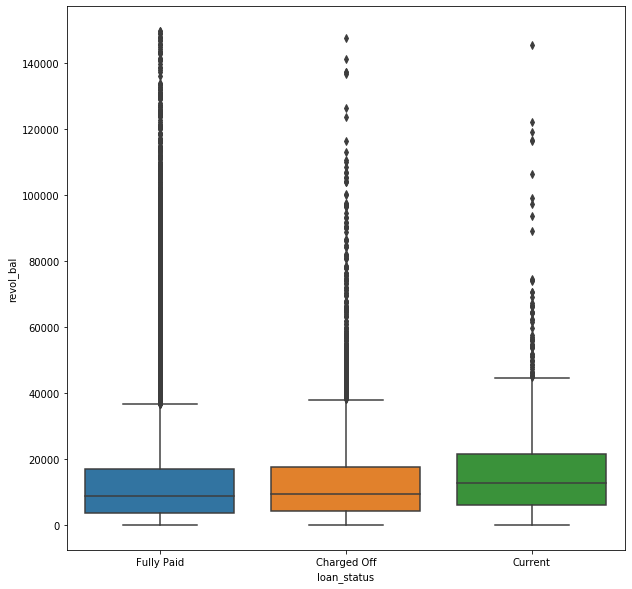

In [15]:
# by revol_bal
plt.figure(figsize=(10, 10))
sns.boxplot(x="loan_status",y="revol_bal",data=loanDf)

# All are approx. same

## revol_util

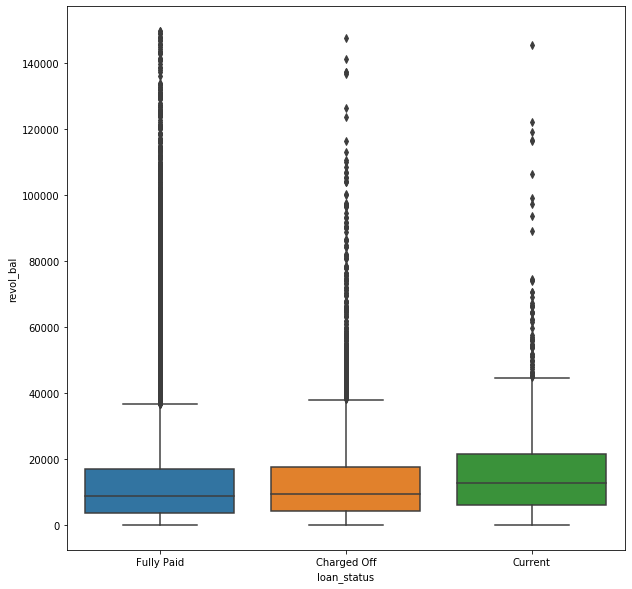

In [19]:
# by revol_util
plt.figure(figsize=(10, 10))
sns.boxplot(x="loan_status",y="revol_bal",data=loanDf)

# All are approx. same

## Bivariate

### loan_amnt vs delinq_2yrs 

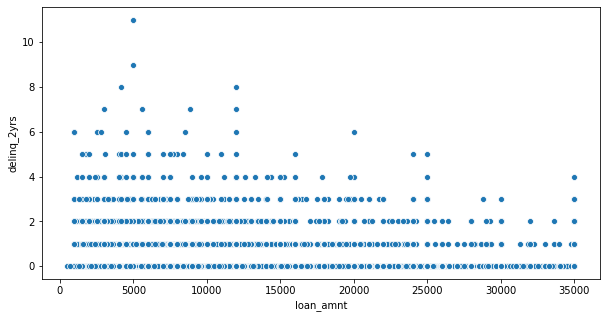

In [16]:
# deliquent over 2 years and loan_amnt
plt.figure(figsize=(10, 5))
sns.scatterplot(x="loan_amnt",y="delinq_2yrs",data=loanDf)

# observation - people deliquent more on small loans
# insight - small loans only have a small fee or no fee (as we can see from late_fee column) when defaulted

### delinq_2yrs vs open_acc

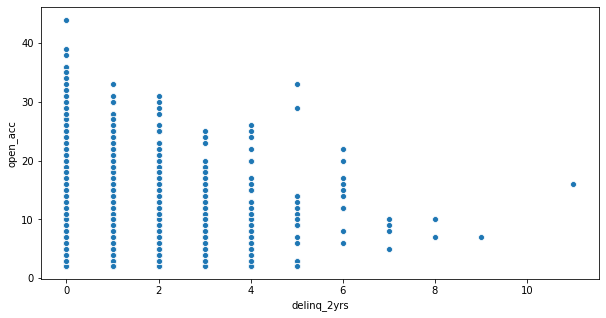

In [32]:
# deliquent over 2 years and open_acc
plt.figure(figsize=(10, 5))
sns.scatterplot(x="delinq_2yrs",y="open_acc",data=loanDf)
# observation - more open accounts -  less deliquent
# insight - people with more accounts will likely have more money.Hence, will have money to pay back. 

### delinq_2yrs vs revol_bal  (Charged off)

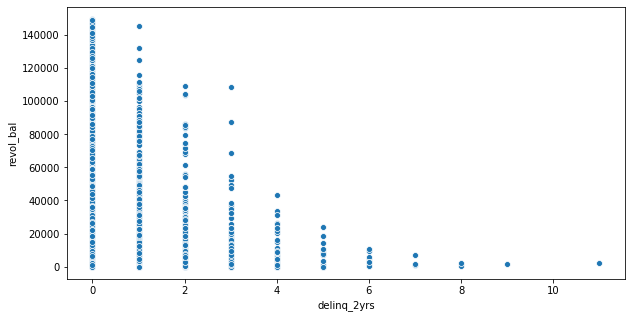

In [33]:
# deliquent over 2 years and revol_bal
plt.figure(figsize=(10, 5))
sns.scatterplot(x="delinq_2yrs",y="revol_bal",data=loanDf)
# observation - more revolving balance -   less deliquent
# insight - client likely taking small loans and defaulting then as there is small or no penalty fee.

### open_acc vs total_acc  (defaulters)

0.30533544816373237

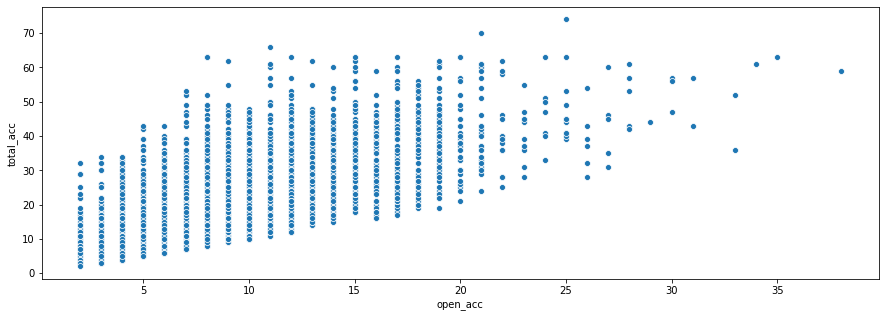

In [58]:
# open_acc  and total_acc
plt.figure(figsize=(15, 5))
sns.scatterplot(x="open_acc",y="total_acc",data=defaulters)
corr = loanDf["revol_bal"].corr(loanDf["revol_util"])
display(corr)
#observation - positively correlated 
# insight - some credit lines out of total credit lines are not open maybe becasue of defaults

### last_pymnt_amnt vs loan_amnt  (defaulters)

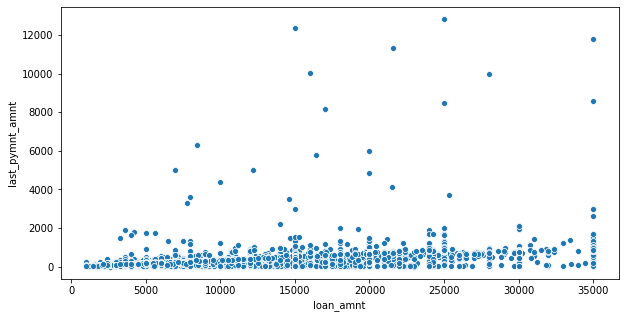

In [49]:
# last_pymnt_amnt and loan_amnt
plt.figure(figsize=(10, 5))
sns.scatterplot(y="last_pymnt_amnt",x="loan_amnt",data=defaulters)
#observation - last payment is low with some spikes
# insight - last payment will usually be low if the client is going to default.He/She my not have the money to repay

### last_pymnt_amnt vs total_amnt (defaulters)

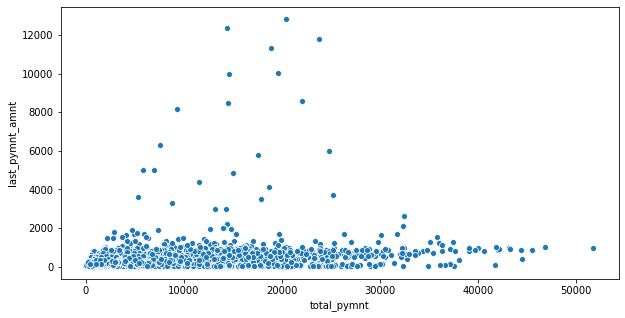

In [158]:
# last_pymnt_amnt and total_amnt
plt.figure(figsize=(10, 5))
sns.scatterplot(x="total_pymnt",y="last_pymnt_amnt",data=defaulters)
#observation - last payment is usually low
# insight - last payment will usually be low if the client is going to default.He/She my not have the money to repay

### recoveries vs loan amounts (defaulters)

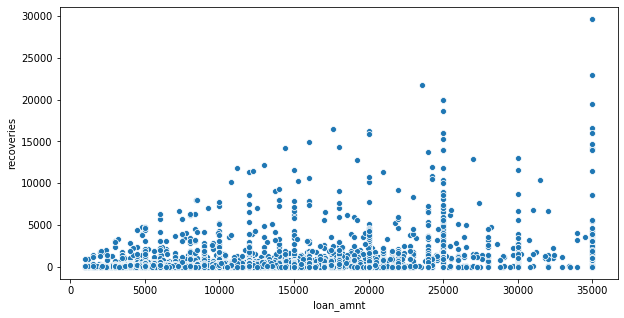

In [160]:
# recoveries
plt.figure(figsize=(10, 5))
sns.scatterplot(x ="loan_amnt",y="recoveries",data=defaulters)
#observation - recovery amount is low for high amount loans 
#insight - large money investment has large risks.Considering most defaulters are individuals,There will have no way to replay that loan.

### Correlation matrix for defaulters

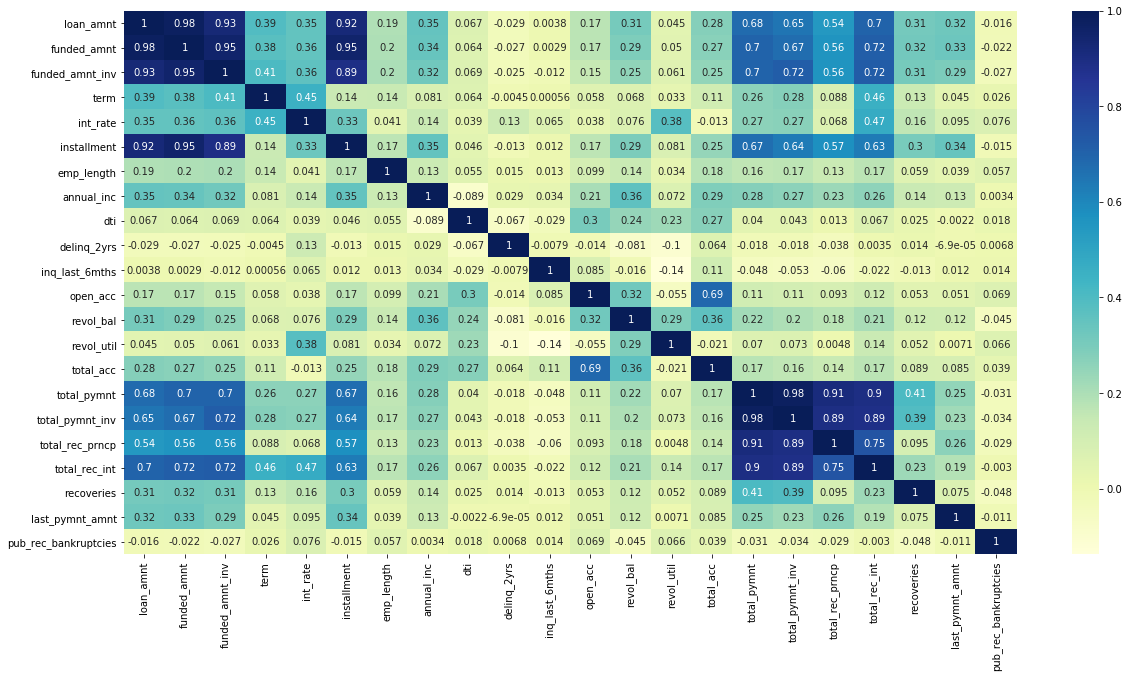

In [187]:
columns = loanDf.describe().columns.to_list()
corrData = defaulters[columns].copy()
corrData.drop(columns=["policy_code","out_prncp","out_prncp_inv","pub_rec","total_rec_late_fee","collection_recovery_fee"],inplace=True)
corrData = corrData.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corrData,annot=True,cmap="YlGnBu")